In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.datasets import make_moons, make_circles, make_classification

In [2]:
def plot_data(ax,ds,name='',marker = 'o',colors =("#FF0000", '#0000FF'),alpha=0.7, s = 150, facecolor=True):
    X, y = ds

    cm_bright = ListedColormap(colors)
    ax.set_title(name, fontsize = 30)
    if facecolor:
        ax.scatter(X[:, 0], X[:, 1],
                   marker = marker, c=y,
                   cmap=cm_bright,s = s,
                   alpha =alpha)
    else:
        ax.scatter(X[:, 0], X[:, 1],
                   marker = marker, c=y,
                   cmap=cm_bright,s = s,
                   facecolor = 'None',
                   alpha =alpha)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    ax.grid(True)
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())

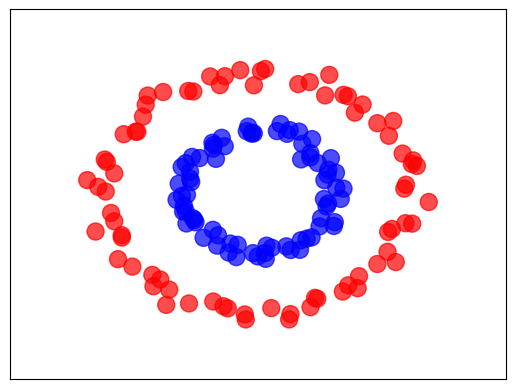

In [3]:
N = 150
noises = 0.05
random_state = 42

X_circle,y_circle = make_circles(n_samples=N, noise=noises, factor=0.5,
                            random_state=random_state )
ax = plt.subplot(1, 1, 1)
plot_data(ax,(X_circle,y_circle))

In [4]:
X_circle.shape

(150, 2)

In [5]:
y_circle

array([0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1])

In [6]:
class KMeans():
    def __init__(self, n_clusters=2, centroids=None,
                 max_iter=10, tol=0.01,
                 metric='euclidean', p=2,
                 random_state=None):
        self.n_clusters = n_clusters
        self.centroids = centroids
        self.max_iter = max_iter
        self.tol = tol
        self.iters = None
        self.inertia = None
        self.metric = metric
        self.p = p
        self.random_state = random_state

    #-------------------------------------
    def distance(self, X1, X2):
        if self.metric == 'euclidean':
            dist = np.sqrt(np.sum(np.square(X1 - X2).T, axis=0))
        if self.metric == 'cityblock':
            dist = np.sum(np.abs(X1 - X2).T, axis=0)
        if self.metric == 'Chebyshev':
            dist = np.max(np.abs(X1 - X2).T, axis=0)
        if self.metric == 'Minkowski':
            dist = np.power(np.sum(np.power(np.abs(X1 - X2), self.p).T, axis=0), 1/self.p)
        return dist

    #-------------------------------------
    def init_centroids(self, X):
        if self.random_state:
            np.random.seed(self.random_state)
        c_idxs = np.random.randint(0, X.shape[0], size=self.n_clusters)
        return X[c_idxs, :]

    #-------------------------------------
    def predict(self, X):
        distances = np.zeros((X.shape[0], self.n_clusters))

        for i, centr in enumerate(self.centroids):
            distances[:, i] = self.distance(centr, X)
        self.inertia = np.sum(np.power(np.min(distances, axis=1), 2))
        return np.argmin(distances, axis=1)

    #-------------------------------------
    def transform(self, X):
        return self.predict(X)

    #-------------------------------------
    def delta_centroids(self, old_centroids):
        return (
            self.distance(self.centroids, old_centroids) /
            self.distance(old_centroids, np.mean(old_centroids, axis=0))
        ).mean()

    #-------------------------------------
    def fit(self, X):
        if self.centroids is None:
            self.centroids = self.init_centroids(X)

        d_centrs = np.inf

        for i in range(self.max_iter):
            old_centroids = np.copy(self.centroids)
            cluster_label = self.predict(X)

            for k in range(self.n_clusters):
                c_idxs = np.flatnonzero(cluster_label == k)
                self.centroids[k] = X[c_idxs].mean(axis=0)

            d_centrs = self.delta_centroids(old_centroids)
            self.iters = i

            if d_centrs <= self.tol:
                break
        return self

    #-------------------------------------
    def fit_transform(self, X):
        return self.fit(X).predict(X)





In [7]:
def plot_cluster(X, centroids, cluster_label, centroids_label, old_centroids=None, old_centroids_label=None, show_grid=True):

    fig = plt.figure(figsize=(11, 10))

    # Change color map to 'plasma' for more powerful colors
    plt.scatter(X[:, 0], X[:, 1],
                c=cluster_label, cmap='plasma',  # Use the 'plasma' colormap
                s=100, alpha=0.7)

    plt.scatter(centroids[:, 0], centroids[:, 1],
                c=centroids_label, cmap='plasma',
                s=400, edgecolors='k')

    if old_centroids is not None:
        plt.scatter(old_centroids[:, 0], old_centroids[:, 1],
                    c=old_centroids_label, cmap='plasma',
                    s=200, edgecolors='k')

    # Option to show grid
    if show_grid:
        plt.grid(True, which='both', color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

    plt.xticks([])
    plt.yticks([])
    plt.show()


We stopped at the iteration:: 5


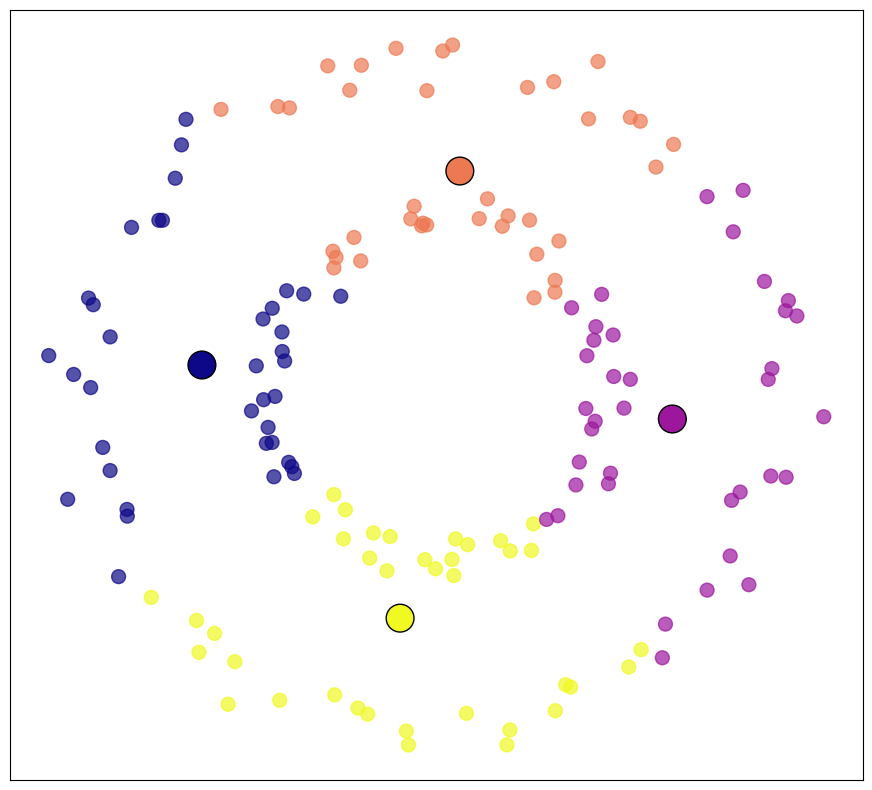

In [8]:


kmeans   = KMeans(n_clusters=4,max_iter=100, tol=0.01, random_state= 42)
c_labels = kmeans.fit_transform(X_circle)

print('We stopped at the iteration::',kmeans.iters)


plot_cluster(X_circle,kmeans.centroids,
             c_labels, np.unique(c_labels),)

In [9]:
pd.crosstab(y_circle,c_labels, rownames=['label'], colnames = ['Predictions'])

Predictions,0,1,2,3
label,,,,
0,18,19,18,20
1,19,18,20,18


In [10]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN


eps = np.linspace(0.1, 1.0, 10)
min_samples = [3, 5, 10]
output = []

for ms in min_samples:
    for ep in eps:
        labels = DBSCAN(min_samples=ms, eps=ep).fit(X_circle).labels_
        # Check if more than one cluster exists
        if len(set(labels)) > 1:
            score = silhouette_score(X_circle, labels)
            output.append((ms, ep, score))
        else:
            print(f"Only one cluster found for min_samples={ms}, eps={ep}, skipping silhouette score.")

# Display the results
for result in output:
    print(f"min_samples={result[0]}, eps={result[1]}, silhouette_score={result[2]}")


Only one cluster found for min_samples=3, eps=0.4, skipping silhouette score.
Only one cluster found for min_samples=3, eps=0.5, skipping silhouette score.
Only one cluster found for min_samples=3, eps=0.6, skipping silhouette score.
Only one cluster found for min_samples=3, eps=0.7000000000000001, skipping silhouette score.
Only one cluster found for min_samples=3, eps=0.8, skipping silhouette score.
Only one cluster found for min_samples=3, eps=0.9, skipping silhouette score.
Only one cluster found for min_samples=3, eps=1.0, skipping silhouette score.
Only one cluster found for min_samples=5, eps=0.4, skipping silhouette score.
Only one cluster found for min_samples=5, eps=0.5, skipping silhouette score.
Only one cluster found for min_samples=5, eps=0.6, skipping silhouette score.
Only one cluster found for min_samples=5, eps=0.7000000000000001, skipping silhouette score.
Only one cluster found for min_samples=5, eps=0.8, skipping silhouette score.
Only one cluster found for min_sam

In [11]:

dbscan=DBSCAN(eps=0.30000000000000004, min_samples=10)
dbscan.fit(X_circle)

DBSCAN(eps=0.30000000000000004, min_samples=10)

In [12]:
dbscan.labels_

array([-1, -1,  0,  0,  0, -1, -1,  0, -1,  0,  0, -1, -1, -1, -1, -1,  0,
       -1, -1,  0, -1,  0, -1,  0,  0,  0,  0,  0, -1, -1, -1, -1, -1, -1,
       -1,  0, -1, -1, -1, -1,  0,  0,  0, -1, -1,  0,  0,  0,  0,  0,  0,
        0, -1, -1,  0, -1, -1, -1, -1, -1,  0, -1, -1, -1,  0, -1,  0,  0,
       -1,  0,  0, -1,  0,  0, -1,  0,  0, -1, -1,  0,  0, -1, -1,  0,  0,
       -1,  0, -1, -1, -1,  0,  0,  0,  0,  0,  0, -1, -1,  0,  0, -1, -1,
       -1, -1,  0, -1,  0,  0, -1, -1, -1,  0, -1,  0, -1,  0, -1,  0,  0,
       -1,  0, -1, -1,  0, -1,  0,  0,  0, -1, -1,  0,  0, -1,  0, -1, -1,
        0,  0,  0,  0,  0, -1,  0,  0, -1, -1,  0, -1,  0,  0])

In [13]:
def plot_dbscan_clusters(X, labels, show_grid=True):
    # Number of clusters in labels, ignoring noise if present (-1 is for noise)
    unique_labels = set(labels)
    n_clusters = len(unique_labels) - (1 if -1 in labels else 0)

    fig = plt.figure(figsize=(11, 10))

    # Create a color map with a different color for each cluster, including noise
    colors = plt.cm.plasma(np.linspace(0, 1, len(unique_labels)))

    for cluster_label, color in zip(unique_labels, colors):
        if cluster_label == -1:
            # Black used for noise.
            color = [0, 0, 0, 1]
            label_name = 'Noise'
        else:
            label_name = f'Cluster {cluster_label}'

        # Plot all points in the cluster
        cluster_points = X[labels == cluster_label]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1],
                    c=[color], label=label_name, s=100, alpha=0.7)

    # Option to show grid
    if show_grid:
        plt.grid(True, which='both', color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

    plt.xticks([])
    plt.yticks([])
    plt.legend(loc='best', markerscale=1, fontsize=12)
    plt.title(f'DBSCAN Clustering with {n_clusters} Clusters and Noise')
    plt.show()


Unique labels found: {0, -1}


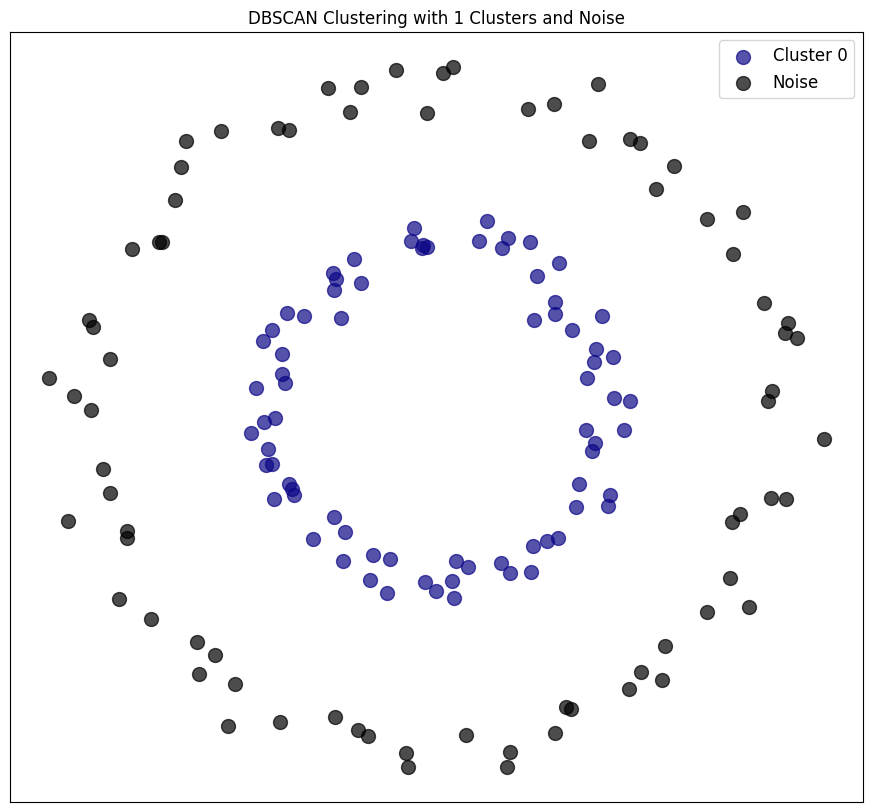

In [25]:
plot_dbscan_clusters(X_circle, dbscan.labels_)